# **Dataset Information**

In astronomy, stellar classification is the classification of stars based on their spectral characteristics. The classification scheme of galaxies, quasars, and stars is one of the most fundamental in astronomy. The early cataloguing of stars and their distribution in the sky has led to the understanding that they make up our own galaxy and, following the distinction that Andromeda was a separate galaxy to our own, numerous galaxies began to be surveyed as more powerful telescopes were built. This datasat aims to classificate stars, galaxies, and quasars based on their spectral characteristics.

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay, precision_score, recall_score, f1_score

In [2]:
import pandas as pd
df=pd.read_csv('star_classification.csv')
df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [3]:
df.shape

(100000, 18)

In [4]:
df.shape[0]

100000

# **Pre-processing Data**

In [5]:
#  remove irrelevant variable

df=df.drop(['obj_ID','spec_obj_ID'],axis=1)



In [6]:
 # Print the number and proportion of irrelevant predictive/independent variables removed

irrelevant_variables = ['obj_ID', 'spec_obj_ID']

# Number of irrelevant variables removed
num_irrelevant_variables = len(irrelevant_variables)

# Proportion of irrelevant variables removed
proportion = num_irrelevant_variables / df.shape[1]

print(f"Number of irrelevant variables removed: {num_irrelevant_variables}")
print(f"Proportion of irrelevant variables removed: {proportion:.2%}")


Number of irrelevant variables removed: 2
Proportion of irrelevant variables removed: 12.50%


In [7]:
#print outliers

# Identify columns with numerical data types
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns


for column in numerical_columns:
  # Calculate the interquartile range (IQR)
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  # Define the lower and upper bounds for outliers
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Find the outliers
  outliers = df[~((df[column] >= lower_bound) & (df[column] <= upper_bound))]

  # Print the outliers
  print(f"Outliers for column '{column}':")
  print(outliers[column])


Outliers for column 'alpha':
Series([], Name: alpha, dtype: float64)
Outliers for column 'delta':
Series([], Name: delta, dtype: float64)
Outliers for column 'u':
1046       29.19901
4401       14.50678
4472       12.26240
6839       28.90174
14227      14.64972
14498      14.15199
14829      14.65722
15666      14.26381
16206      15.15612
16370      28.72397
17275      14.56906
17874      14.93182
18153      14.92536
19400      14.64617
19525      29.32565
20225      29.23438
21245      30.66039
23852      15.26540
31397      13.89799
32640      15.16132
41968      15.28236
43174      28.79676
48085      15.13130
48670      14.77106
48671      14.60899
53840      14.80675
55197      14.31105
56693      32.78139
57763      10.99623
61260      14.93727
62363      15.16790
62647      29.04068
66906      14.97155
75369      14.14713
75583      12.99664
75620      12.30349
75784      12.10168
75962      15.31365
76321      13.94716
76986      15.32899
79543   -9999.00000
80120      15.139

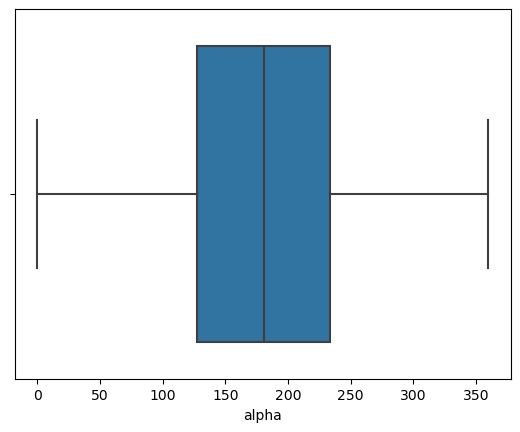

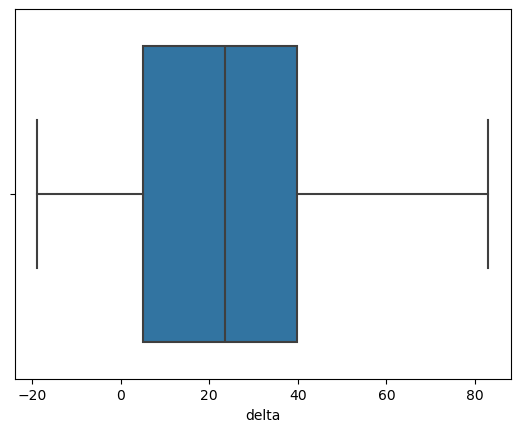

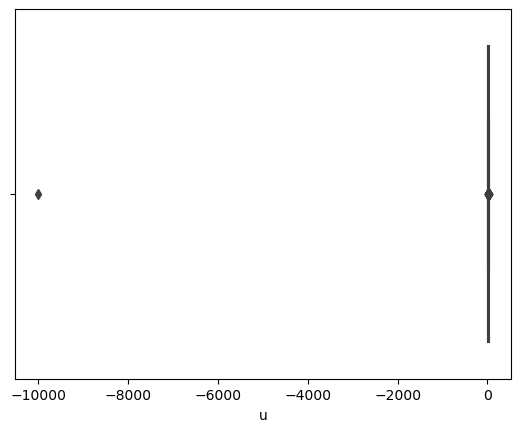

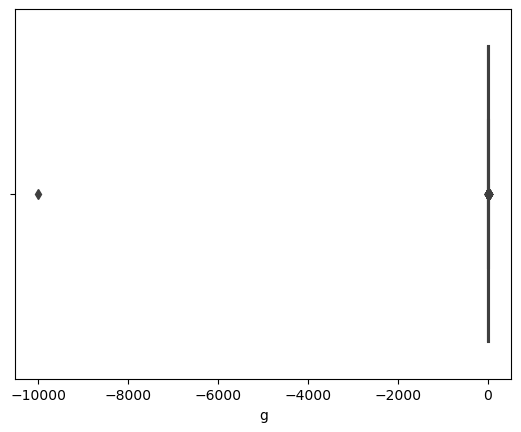

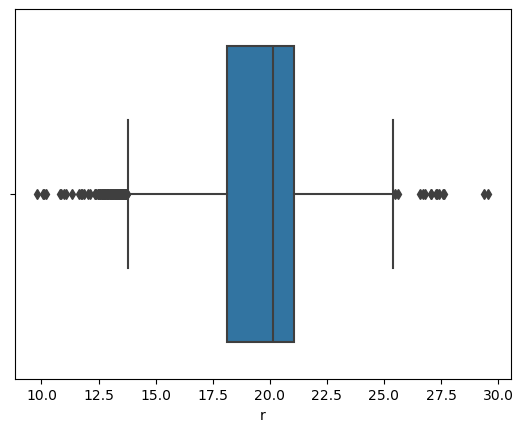

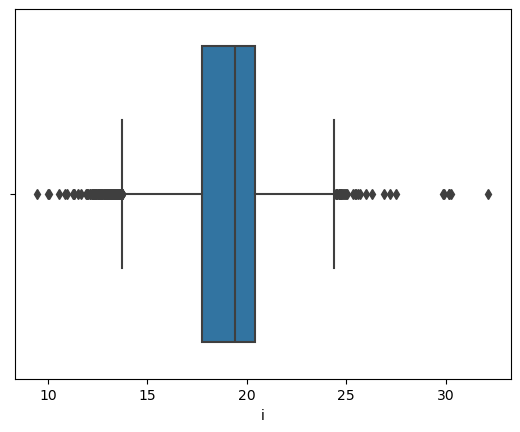

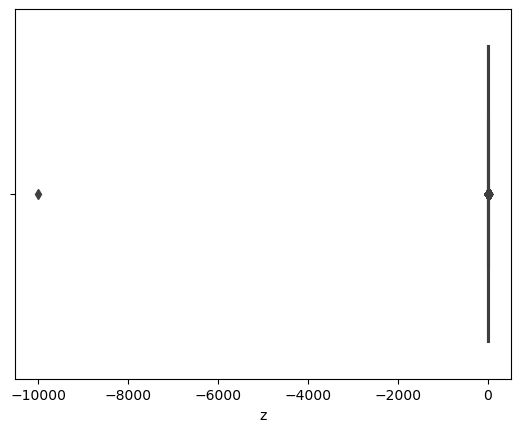

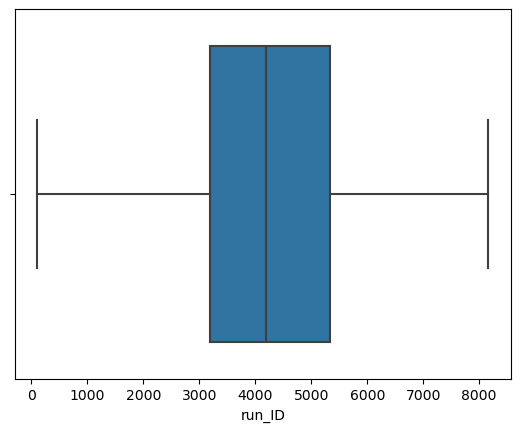

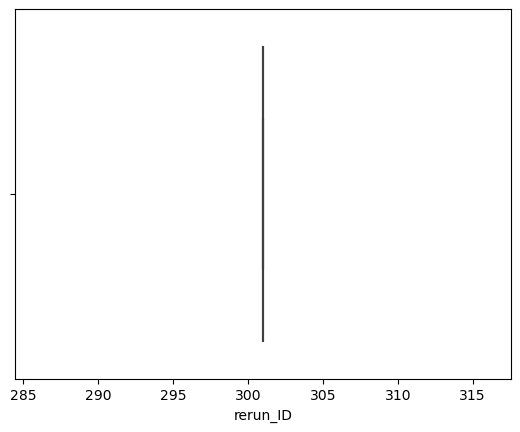

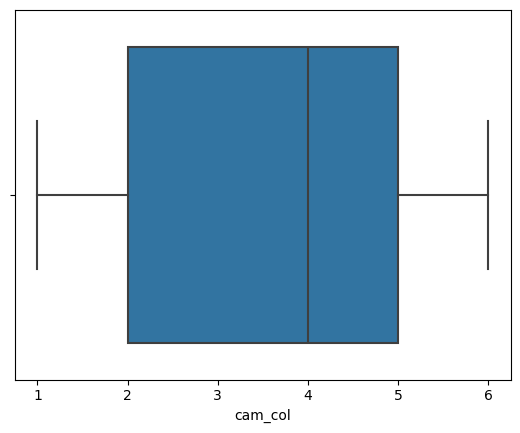

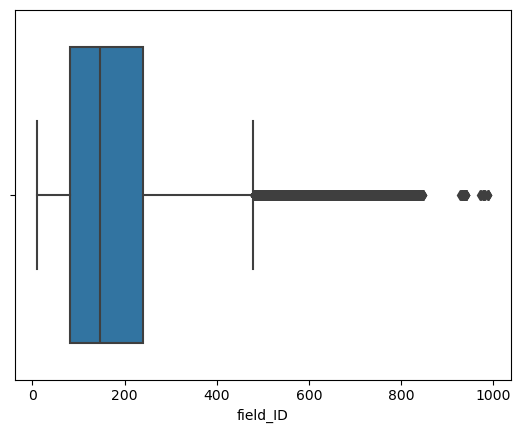

TypeError: Horizontal orientation requires numeric `x` variable.

In [8]:


# Create a boxplot for each column in the DataFrame
for column in df:
    sns.boxplot(x=df[column])
    plt.show()


In [ ]:
# prompt: sum of outliers

count = 0
for col in numerical_columns:
  # Calculate the interquartile range (IQR)
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1

  # Define the lower and upper bounds for outliers
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Find the outliers
  outliers = df[~((df[col] >= lower_bound) & (df[col] <= upper_bound))]

  # Count the outliers
  count += len(outliers)

print(f"Total number of outliers: {count}")


In [ ]:
# filtering outliers

# Remove outliers
for col in numerical_columns:
  # Calculate the interquartile range (IQR)
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1

  # Define the lower and upper bounds for outliers
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Find the outliers
  outliers = df[~((df[col] >= lower_bound) & (df[col] <= upper_bound))]

  # Remove the outliers
  df = df.drop(outliers.index)

# Print the new shape of the DataFrame
print(df.shape)


In [ ]:
#Number and proportion of outliers filtered

# Number of outliers removed
outliers_removed = count

# Proportion of outliers removed
proportion_outliers_removed = outliers_removed / df.shape[0]

print(f"Number of outliers removed: {outliers_removed}")
print(f"Proportion of outliers removed: {proportion_outliers_removed:.2%}")


In [ ]:
dimension = df.shape

new_df = df.drop_duplicates()
dimension_after = new_df.shape
removed = dimension[0] - dimension_after[0]
prop = removed / dimension[0]
df = new_df
print("Number of Duplicate Records Removed:", removed)
print("Proportion of Duplicate Records Removed:", prop)


In [ ]:
#Check shape before drop
df.shape

In [ ]:
df=df.drop_duplicates()

Removing Missing Values

In [ ]:
df.isna().sum()

In [ ]:
df['class'].value_counts()

Checking for Datatypes

In [ ]:
df.dtypes

In [9]:
#REMOVING WARNINGS
import warnings
warnings.filterwarnings('ignore')

Handling The Datatype

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['class']=le.fit_transform(df['class'])
df

,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,class,redshift,plate,MJD,fiber_ID
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,0,0.634794,5812,56354,171
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,0,0.779136,10445,58158,427
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,0,0.644195,4576,55592,299
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,0,0.932346,9149,58039,775
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,0,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,0,0.000000,9374,57749,438
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,0,0.404895,7626,56934,866
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,0,0.143366,2764,54535,74
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,0,0.455040,6751,56368,470


In [11]:
#  dimensionality reduction based on pca

from sklearn.decomposition import PCA

# Standardize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Perform PCA
pca = PCA(n_components=0.95)
reduced_data = pca.fit_transform(scaled_data)

# Print the shape of the reduced data
print(reduced_data.shape)


(100000, 8)


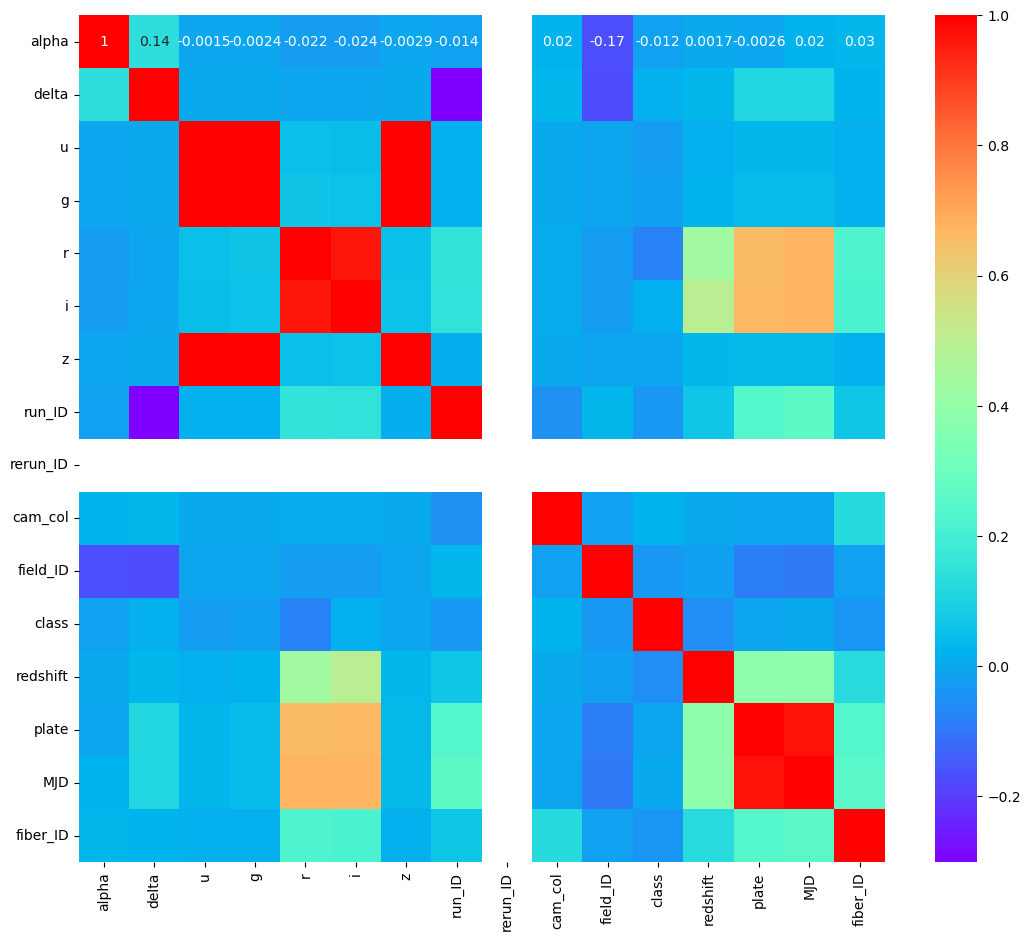

In [12]:
#Finding the correlation using heat map
corr=df.corr()
plt.figure(figsize=(13,11))
#annot=True: This parameter is used to annotate each cell of the heatmap
#with the numeric value.
sns.heatmap(corr,annot=True,cmap='rainbow')
print()
print()
plt.show()

In [16]:
df.to_csv('star_Python_Preprocess.csv', index=False)  # Set index=False to avoid saving row indices


A heatmap is a two-dimensional graphical representation of data where the individual values that are contained in a matrix are represented as colours

From the above figure it is clear that the variables Histogram median,Histogram mode and Histogram mean are highly positively correlated which shows that the significance of all the three vriables in determining the target column 'fetal_health' is same.Also the two variables Histogram min and Histogram max are highly negatively correlated.But since all the features are important none of the features will be removed from the dataset.

# **Separate input and output as X and y**

In [17]:
X=df.drop(['class'],axis=1)
X

,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,redshift,plate,MJD,fiber_ID
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,0.634794,5812,56354,171
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,0.779136,10445,58158,427
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,0.644195,4576,55592,299
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,0.932346,9149,58039,775
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,0.000000,9374,57749,438
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,0.404895,7626,56934,866
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,0.143366,2764,54535,74
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,0.455040,6751,56368,470


In [18]:
y=df.iloc[:,11]
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: class, Length: 100000, dtype: int64

The value counts in above showing that the data is imbalanced..So they want to balance.

Normalization

In [19]:
#Initialize the MinMaxScaler object
scaler=MinMaxScaler()
#Fit and transform fetures value
X_scaled=scaler.fit_transform(X)
X_scaled


array([[0.37690482, 0.50380246, 0.99911256, ..., 0.45159189, 0.64800655,
        0.17017017],
       [0.40228576, 0.49181212, 0.99920216, ..., 0.8288413 , 0.89432004,
        0.42642643],
       [0.39495978, 0.53413882, 0.99925055, ..., 0.35094862, 0.54396505,
        0.2982983 ],
       ...,
       [0.62384846, 0.33880973, 0.99884246, ..., 0.20340363, 0.399645  ,
        0.07307307],
       [0.58962907, 0.6429744 , 0.99925925, ..., 0.52805146, 0.64991808,
        0.46946947],
       [0.54692681, 0.67052516, 0.99898725, ..., 0.58171159, 0.75040961,
        0.85085085]])

# **Data Splitting**

In [20]:
#Split df at 70-30 ratio
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1)

In [21]:
#check the shape of X_os_train,X_os_test,y_os_train and y_os_test
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

X_train: (70000, 15)
X_test: (30000, 15)
y_train: (70000,)
y_test: (30000,)


A train test split is when you split your data into a training set and a testing set. The training set is used for training the model, and the testing set is used to test your model. This allows you to train your models on the training set, and then test their accuracy on the unseen testing set

Model Building--
 Random Forest
 *italicized text*

In [22]:
#create each models object
from sklearn.ensemble import RandomForestClassifier
r_forest=RandomForestClassifier(n_estimators=100,random_state=42)
r_forest.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [23]:
y_pred=r_forest.predict(X_test)
y_pred

array([0, 0, 2, ..., 2, 1, 0])

Predicting

In [24]:
precision = precision_score(y_test, y_pred, average='weighted')
recall= recall_score(y_test, y_pred, average='weighted')
f1= f1_score(y_test, y_pred, average='weighted')
print("Precision:", round(precision, 3))
print("Recall:", round(recall, 3))
print("F1-Score:", round(f1, 3))
print(classification_report(y_test,y_pred))
y_pred=r_forest.predict(scaler.transform([[340.995120509191,20.5894762801019,23.48827,23.33776,21.32195,20.25615,19.54544,8102,301,3,110,1.424659,5026,55855,741]]))
if y_pred==0:
    print('GALAXY')
elif y_pred==1:
    print('QSO')
else:
    print('STAR')

Precision: 0.977
Recall: 0.977
F1-Score: 0.977
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     17821
           1       0.97      0.93      0.95      5725
           2       0.98      1.00      0.99      6454

    accuracy                           0.98     30000
   macro avg       0.98      0.97      0.97     30000
weighted avg       0.98      0.98      0.98     30000

QSO


Model building --- GradientBoostingClassifier

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
g_boost=GradientBoostingClassifier(n_estimators=100,random_state=42)
g_boost.fit(X_train,y_train)

GradientBoostingClassifier(random_state=42)

In [26]:
y_pred_i=g_boost.predict(X_test)
y_pred_i

array([0, 0, 2, ..., 2, 1, 0])

In [27]:
precision = precision_score(y_test, y_pred_i, average='weighted')
recall= recall_score(y_test, y_pred_i, average='weighted')
f1= f1_score(y_test, y_pred_i, average='weighted')
print("Precision:", round(precision, 3))
print("Recall:", round(recall, 3))
print("F1-Score:", round(f1, 3))
print(classification_report(y_test,y_pred_i))
y_pred_i=g_boost.predict(scaler.transform([[340.995120509191,20.5894762801019,23.48827,23.33776,21.32195,20.25615,19.54544,8102,301,3,110,1.424659,5026,55855,741]]))
if y_pred_i==0:
    print('GALAXY')
elif y_pred_i==1:
    print('QSO')
else:
    print('STAR')

Precision: 0.974
Recall: 0.974
F1-Score: 0.974
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     17821
           1       0.97      0.92      0.94      5725
           2       0.98      1.00      0.99      6454

    accuracy                           0.97     30000
   macro avg       0.97      0.97      0.97     30000
weighted avg       0.97      0.97      0.97     30000

QSO
